# Pandas 3
### Name Dallin Stewart
### Class ACME 002
### Date In a galaxy far far away

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [19]:
def prob1():
    """
    Use groupby objects to determine information about private
    and public universities.
    Specifically examine the columns 'S.F.Ratio', 'Top10perc',
    and 'Top25perc'.
    For each column return the values of the describe function
    for the type of university with the higher mean.
    
    Return:
        ans_1 (ndarray): describe array of universities with 
                         higher S.F.Ratio
        ans_2 (ndarray): describe array of universities with
                         more students from Top10perc
        ans_3 (ndarray): describe array of universities with
                         more students from Top25perc
    """
    # load data
    college = pd.read_csv("/mnt/c/Users/dalli/source/acme_senior/volume3/byu_vol3/Pandas3/college.csv")

    # get public and private groups
    public = college.groupby("Private").get_group("No")
    private = college.groupby("Private").get_group("Yes")

    # get student to faculty ratio data
    ratio = [public["S.F.Ratio"], private["S.F.Ratio"]]
    ind_ratio = np.argmax([ratio[0].mean(), ratio[1].mean()])

    # get top ten percent data
    top_ten = [public["Top10perc"], private["Top10perc"]]
    ind_ten = np.argmax([top_ten[0].mean(), top_ten[1].mean()])

    # get top twenty five percent data
    top_twenty = [public["Top25perc"], private["Top25perc"]]
    ind_twen = np.argmax([top_twenty[0].mean(), top_twenty[1].mean()])

    return ratio[ind_ratio].describe().to_numpy(), top_ten[ind_ten].describe().to_numpy(), top_twenty[ind_twen].describe().to_numpy()


prob1()

(array([212.        ,  17.13915094,   3.41804873,   6.7       ,
         15.1       ,  17.25      ,  19.325     ,  28.8       ]),
 array([565.        ,  29.33097345,  17.85139147,   1.        ,
         17.        ,  25.        ,  36.        ,  96.        ]),
 array([565.        ,  56.95752212,  19.58836048,   9.        ,
         42.        ,  55.        ,  70.        , 100.        ]))

# Problem 2

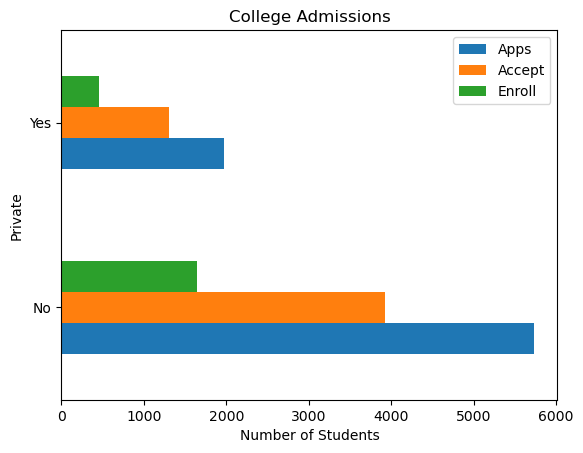

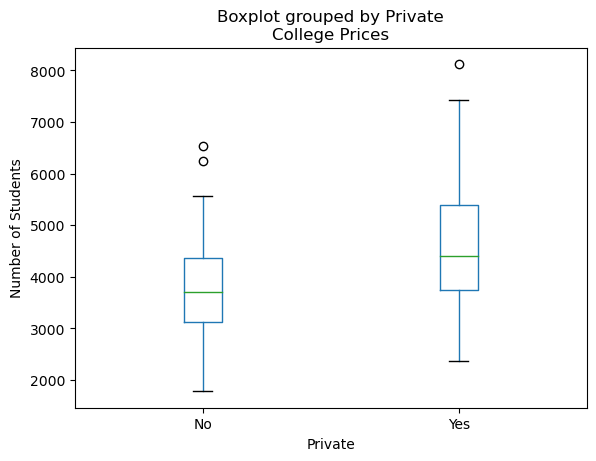

In [8]:
def prob2():
    """
    Use groupby visualizations to compare the following
    in private and public universities:
        1. Number of applicants, accept applicants, and
           enrolled applicants
        2. Range of price for room and board
    """
    # load data
    college = pd.read_csv("/mnt/c/Users/dalli/source/acme_senior/volume3/byu_vol3/Pandas3/college.csv")

    # get public and private groups
    # public = college.groupby("Private").get_group("No")
    private = college.groupby("Private")

    private[["Apps", "Accept", "Enroll"]].mean().plot(kind="barh", title="College Admissions")
    plt.xlabel("Number of Students")

    college.boxplot(["Room.Board"], by="Private", grid=False)
    plt.title("College Prices")
    plt.ylabel("Number of Students")

prob2()

# Problem 3

In [10]:
def prob3():
    """
    Use Ohio_1999.csv and pivot tables to answer the
    following questions
        1. Which race/sex combination makes the most money in total?
        2. Which race/sex combination worked the least amount of 
            cumulative hours?
        3. What race/sex combination worked the most hours per week per person?
    
    Returns:
        ans_1 (tuple): tuple with race and sex code, respectively
        ans_2 (tuple): tuple with race and sex code, respectively
        ans_3 (tuple): tuple with race and sex code, respectively
    """
    # read data
    ohio = pd.read_csv("/mnt/c/Users/dalli/source/acme_senior/volume3/byu_vol3/Pandas3/Ohio_1999.csv")

    # makes the most money in total
    question1 = ohio.pivot_table(values="Usual Weekly Earnings", index="Race", columns="Sex", aggfunc="max")

    # worked the least amount
    question2 = ohio.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc="sum")

    # highest average hours
    question3 = ohio.pivot_table(values="Usual Hours Worked", index="Race", columns="Sex", aggfunc="mean")

    # return a tuple of tuples of indexes for the questions asked
    return question1.stack().idxmax(), question2.stack().idxmin(), question3.stack().idxmax(), 


prob3()

((1, 1), (3, 2), (3, 1))

# Problem 4

In [14]:
def prob4():
    """
    Use Ohio_1999.csv to answer the following questions:
        1. What is the most common degree among workers?
        2. Which age group works the most hours on average?
        3. What age/degree combination has the smallest yearly
           salary on average?
    
    Return:
        ans_1 (Interval): degree interval
        ans_2 (Interval): age interval
        ans_3 (Interval, Interval): age interval and degree interval
    """
    # load data
    ohio = pd.read_csv("/mnt/c/Users/dalli/source/acme_senior/volume3/byu_vol3/Pandas3/Ohio_1999.csv")

    # find most common education
    find_degree = pd.cut(ohio["Educational Attainment"],  [0, 38, 42, 47])
    part1 = find_degree.value_counts().idxmax()

    # find the hardest working age
    find_age = pd.qcut(ohio["Age"],  6)
    part2 = ohio.pivot_table(values="Usual Hours Worked", index=find_age, aggfunc="mean", fill_value='-')
    part2 = part2.stack().idxmax()[0]
    
    find_low = ohio.pivot_table(values="Yearly Salary", index=find_age, columns=find_degree, aggfunc='mean')
    part3 = find_low.stack().idxmin()
    
    return part1, part2, part3


prob4()

(Interval(38, 42, closed='right'),
 Interval(40.0, 46.0, closed='right'),
 (Interval(15.999, 29.0, closed='right'), Interval(0, 38, closed='right')))

# Problem 5

In [35]:
def prob5():
   # load data
   college = pd.read_csv("/mnt/c/Users/dalli/source/acme_senior/volume3/byu_vol3/Pandas3/college.csv")
   type_group = college.groupby("Private")
   public = type_group.get_group("No")
   private = type_group.get_group("Yes")
  
   # part one NEW
   college["alumni_partition"] = pd.cut(college["perc.alumni"], [0, 20, 40, 60, 80, 100])
   grouped = college.groupby(["alumni_partition", "Private"])
   # print("Part one")
   # print(grouped.size().unstack())

   # part two
   grad_pub = pd.qcut(public["Grad.Rate"], 5)
   grad_pri = pd.qcut(private["Grad.Rate"], 5)
   graduation = grad_pri.value_counts().idxmax() == grad_pub.value_counts().idxmax()
   # print("\nPart two:")
   # print(graduation)

   # part three NEW
   college["Acceptance.Rate"] = college["Accept"] / college["Apps"]
   college["Acceptance.Rate.Part"] = pd.cut(college["Acceptance.Rate"], [0, 0.25, 0.5, 0.75, 1])
   grouped = college.groupby(["Acceptance.Rate.Part", "Private"])
   least_admitted = grouped["Top10perc"].mean().unstack().idxmin()
   # print("\nPart three:")
   # print(least_admitted)

   # part four
   acceptance = pd.qcut(college["Acceptance.Rate"], 4)
   explanation = "Private colleges have more students from the top 10% of their high school class, so even though they have low acceptance rates they can select more of these students."
   # print("\nPart Four")
   # print(college.pivot_table(values="Top10perc", index="Private", columns=acceptance, aggfunc="count"))

   return False, graduation, True, explanation

prob5()

(False,
 False,
 True,
 'Private colleges have more students from the top 10% of their high school class, so even though they have low acceptance rates they can select more of these students.')